# Customer Review Analysis 
# For Leading Woman Clothing E-Commerce Company

In [1]:
import pandas as pd
import numpy as np
import os

from scipy import sparse
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import string
import re    
import nltk
from nltk.corpus import stopwords


from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import textblob
from textblob import TextBlob


import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Womens Clothing Reviews Data.xlsx to Womens Clothing Reviews Data.xlsx


In [ ]:
os.chdir(r'C:\Users\Hp\Downloads\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform')

In [4]:
#Importing Dataset!
wcrd=pd.read_excel('Womens Clothing Reviews Data.xlsx')
wcrd

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [ ]:
#Checking info of dataset!
wcrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [ ]:
#Description of Dataset!
wcrd.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [ ]:
#Checking how many unique values are there in each Variable!
wcrd.nunique()

Product ID         1206
Category              3
Subcategory1          6
SubCategory2         20
Location              4
Channel               2
Customer Age         77
Review Title      13993
Review Text       22634
Rating                5
Recommend Flag        2
dtype: int64

In [5]:
#Dropping Nan Values!
wcrd=wcrd.dropna()

In [ ]:
wcrd.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [6]:
#Making copy after dropping Nan values and storing it in wcrd1!
wcrd1=wcrd.copy()

In [ ]:
wcrd1

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [7]:
#Adding underscores to column names!
wcrd1.columns=['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
               'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
               'Recommend_Flag']

In [ ]:
#Sentiment Polarity Score of a Review Text!
TextBlob(wcrd1.Review_Text[2]).sentiment.polarity

0.07367494824016563

In [ ]:
wcrd1.Review_Text[2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [ ]:
#Storing stop words in s1!
s1 = list(stopwords.words('english'))

In [ ]:
#Lambda Function to remove stop words from each review text!
wcrd1['cleaned_review']=wcrd1.Review_Text.apply(lambda s :' '.join(list([x for x in s.lower().split() if x not in s1])))

In [ ]:
review_eda=wcrd1[['Rating','Review_Text','cleaned_review']]
review_eda

,Rating,Review_Text,cleaned_review
2,3,I had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...
3,5,"I love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo..."
4,5,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...
5,2,"I love tracy reese dresses, but this one is no...","love tracy reese dresses, one petite. 5 feet t..."
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...
...,...,...,...
23481,5,I was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...
23482,3,"It reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi..."
23483,3,"This fit well, but the top was very see throug...","fit well, top see through. never would worked ..."
23484,3,I bought this dress for a wedding i have this ...,"bought dress wedding summer, cute. unfortunate..."


In [ ]:
#Scoring sentiment score for cleaned reviews!
review_eda['sentiment_score_cleaned'] = review_eda.cleaned_review.apply(lambda x : TextBlob(x).sentiment.polarity)

In [ ]:
#Scoring sentiment score for actual reviews!
review_eda['sentiment_score_original'] = review_eda.Review_Text	.apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
review_eda

,Rating,Review_Text,cleaned_review,sentiment_score_cleaned,sentiment_score_original
2,3,I had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,0.079459,0.073675
3,5,"I love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",0.550000,0.550000
4,5,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,0.617188,0.512891
5,2,"I love tracy reese dresses, but this one is no...","love tracy reese dresses, one petite. 5 feet t...",0.150000,0.178750
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,0.160500,0.133750
...,...,...,...,...,...
23481,5,I was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,0.744444,0.552667
23482,3,"It reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",0.191667,0.091667
23483,3,"This fit well, but the top was very see throug...","fit well, top see through. never would worked ...",0.450000,0.414286
23484,3,I bought this dress for a wedding i have this ...,"bought dress wedding summer, cute. unfortunate...",0.425000,0.322222


In [ ]:
#Checking Length of cleaned reviews text!
review_eda['original_length'] = review_eda.Review_Text.apply(lambda x:len(x))

In [ ]:
#Checking Length of actual reviews text!
review_eda['cleaned_review_length'] =review_eda.cleaned_review.apply(lambda x:len(x))

In [ ]:
review_eda

,Rating,Review_Text,cleaned_review,sentiment_score_cleaned,sentiment_score_original,original_length,cleaned_review_length
2,3,I had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,0.079459,0.073675,500,327
3,5,"I love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",0.550000,0.550000,124,100
4,5,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,0.617188,0.512891,192,117
5,2,"I love tracy reese dresses, but this one is no...","love tracy reese dresses, one petite. 5 feet t...",0.150000,0.178750,488,280
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,0.160500,0.133750,496,331
...,...,...,...,...,...,...,...
23481,5,I was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,0.744444,0.552667,131,67
23482,3,"It reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",0.191667,0.091667,223,173
23483,3,"This fit well, but the top was very see throug...","fit well, top see through. never would worked ...",0.450000,0.414286,208,118
23484,3,I bought this dress for a wedding i have this ...,"bought dress wedding summer, cute. unfortunate...",0.425000,0.322222,427,255


In [ ]:
#Setting Threshold for Positive, Negative and Neutral Sentiment!
review_eda['new_sentiment'] = np.where(review_eda.sentiment_score_cleaned > 0.25, 'Positive', 
                               np.where(review_eda.sentiment_score_cleaned <0.1, 'Negative', 'Neutral'))

In [ ]:
review_eda

,Rating,Review_Text,cleaned_review,sentiment_score_cleaned,sentiment_score_original,original_length,cleaned_review_length,new_sentiment
2,3,I had such high hopes for this dress and reall...,high hopes dress really wanted work me. initia...,0.079459,0.073675,500,327,Negative
3,5,"I love, love, love this jumpsuit. it's fun, fl...","love, love, love jumpsuit. fun, flirty, fabulo...",0.550000,0.550000,124,100,Positive
4,5,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie. per...,0.617188,0.512891,192,117,Positive
5,2,"I love tracy reese dresses, but this one is no...","love tracy reese dresses, one petite. 5 feet t...",0.150000,0.178750,488,280,Neutral
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,0.160500,0.133750,496,331,Neutral
...,...,...,...,...,...,...,...,...
23481,5,I was very happy to snag this dress at such a ...,happy snag dress great price! easy slip flatte...,0.744444,0.552667,131,67,Positive
23482,3,"It reminds me of maternity clothes. soft, stre...","reminds maternity clothes. soft, stretchy, shi...",0.191667,0.091667,223,173,Neutral
23483,3,"This fit well, but the top was very see throug...","fit well, top see through. never would worked ...",0.450000,0.414286,208,118,Positive
23484,3,I bought this dress for a wedding i have this ...,"bought dress wedding summer, cute. unfortunate...",0.425000,0.322222,427,255,Positive


In [ ]:
#Correlations between the Variables!
review_eda.corr()

,Rating,sentiment_score_cleaned,sentiment_score_original,original_length,cleaned_review_length
Rating,1.000000,0.361994,0.382613,-0.055173,-0.034813
sentiment_score_cleaned,0.361994,1.000000,0.956074,-0.280078,-0.269243
sentiment_score_original,0.382613,0.956074,1.000000,-0.288578,-0.274011
original_length,-0.055173,-0.280078,-0.288578,1.000000,0.982260
cleaned_review_length,-0.034813,-0.269243,-0.274011,0.982260,1.000000


In [ ]:
#Checking for separate review rating how many Positive,Negative,Neutral sentiment reviews are being Generated!
pd.crosstab(review_eda.Rating,review_eda.new_sentiment)

new_sentiment,Negative,Neutral,Positive
Rating,,,
1,337,237,117
2,564,487,309
3,759,983,722
4,776,1724,1789
5,967,3188,6703


In [ ]:
#Separating postive and negative review text!
positive_ratings = review_eda[review_eda.Rating == 5].Review_Text

In [ ]:
negative_ratings=review_eda[review_eda.Rating == 1].Review_Text

In [8]:
stop = list(STOPWORDS)+['bought','size','fit','wear','one','medium']
stop

["she'll",
 'some',
 'doing',
 'but',
 'yourself',
 'same',
 'just',
 'ought',
 'all',
 'otherwise',
 'shall',
 "weren't",
 "don't",
 "won't",
 'being',
 'until',
 "didn't",
 "let's",
 "wasn't",
 'is',
 'these',
 "they'll",
 'were',
 "why's",
 "shouldn't",
 'hers',
 'there',
 'him',
 'my',
 'than',
 "he'll",
 'who',
 'also',
 'most',
 "wouldn't",
 'http',
 'those',
 'me',
 "what's",
 "you'd",
 'your',
 'for',
 "isn't",
 'am',
 'both',
 'when',
 'whom',
 'our',
 "i've",
 'this',
 'here',
 "it's",
 'only',
 "i'd",
 'under',
 'cannot',
 'she',
 'below',
 'few',
 "you've",
 "that's",
 'over',
 'by',
 'else',
 'you',
 'himself',
 "they'd",
 'been',
 "i'm",
 "hasn't",
 "you'll",
 'such',
 "when's",
 'about',
 "she's",
 'r',
 'herself',
 'ourselves',
 'own',
 "where's",
 'against',
 "hadn't",
 "aren't",
 "how's",
 'they',
 "he'd",
 'can',
 'com',
 "they're",
 'any',
 'down',
 'out',
 'an',
 'further',
 'i',
 'had',
 'nor',
 'their',
 'what',
 'since',
 'during',
 'if',
 'of',
 "haven't",
 'wh

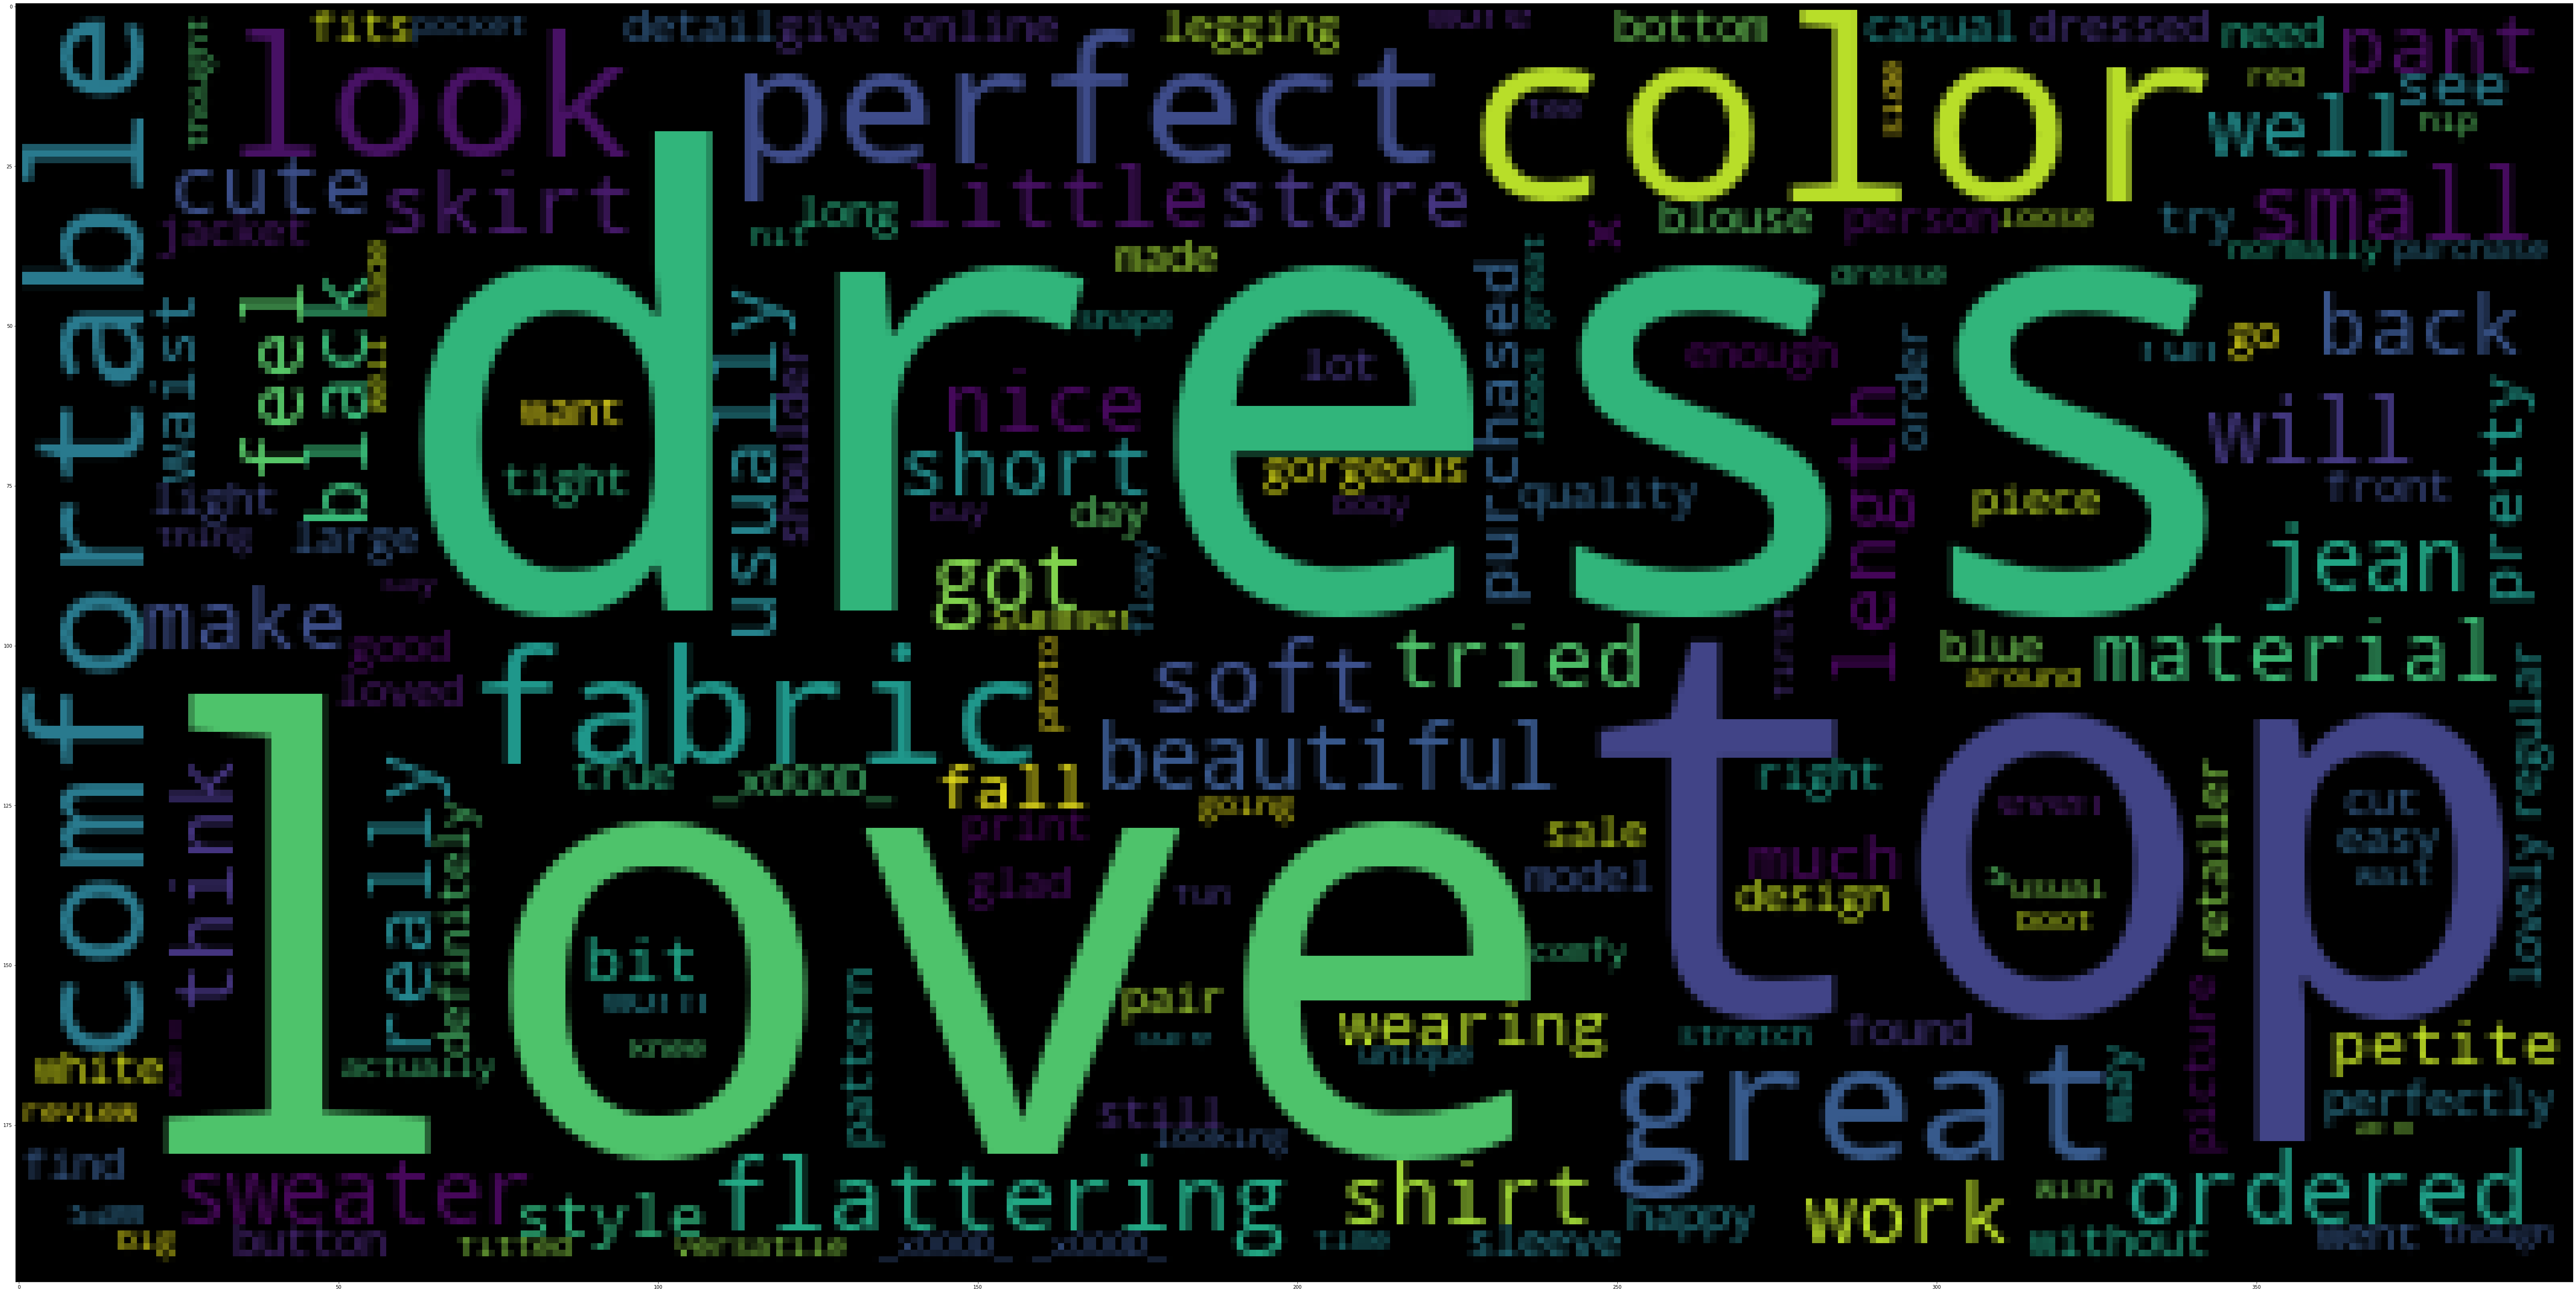

In [ ]:
#WordCloud for Postive Review!
wc = WordCloud(stopwords = stop).generate(' '.join(positive_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(180,50))
plt.imshow(wc)

In [ ]:
stop2 = list(STOPWORDS)+['bought','size','fit','wear','one','medium','top','dress','look','shirt','fabric','color',
                        'ordered','look','looked','even','looks','love','loved','much','way','see']

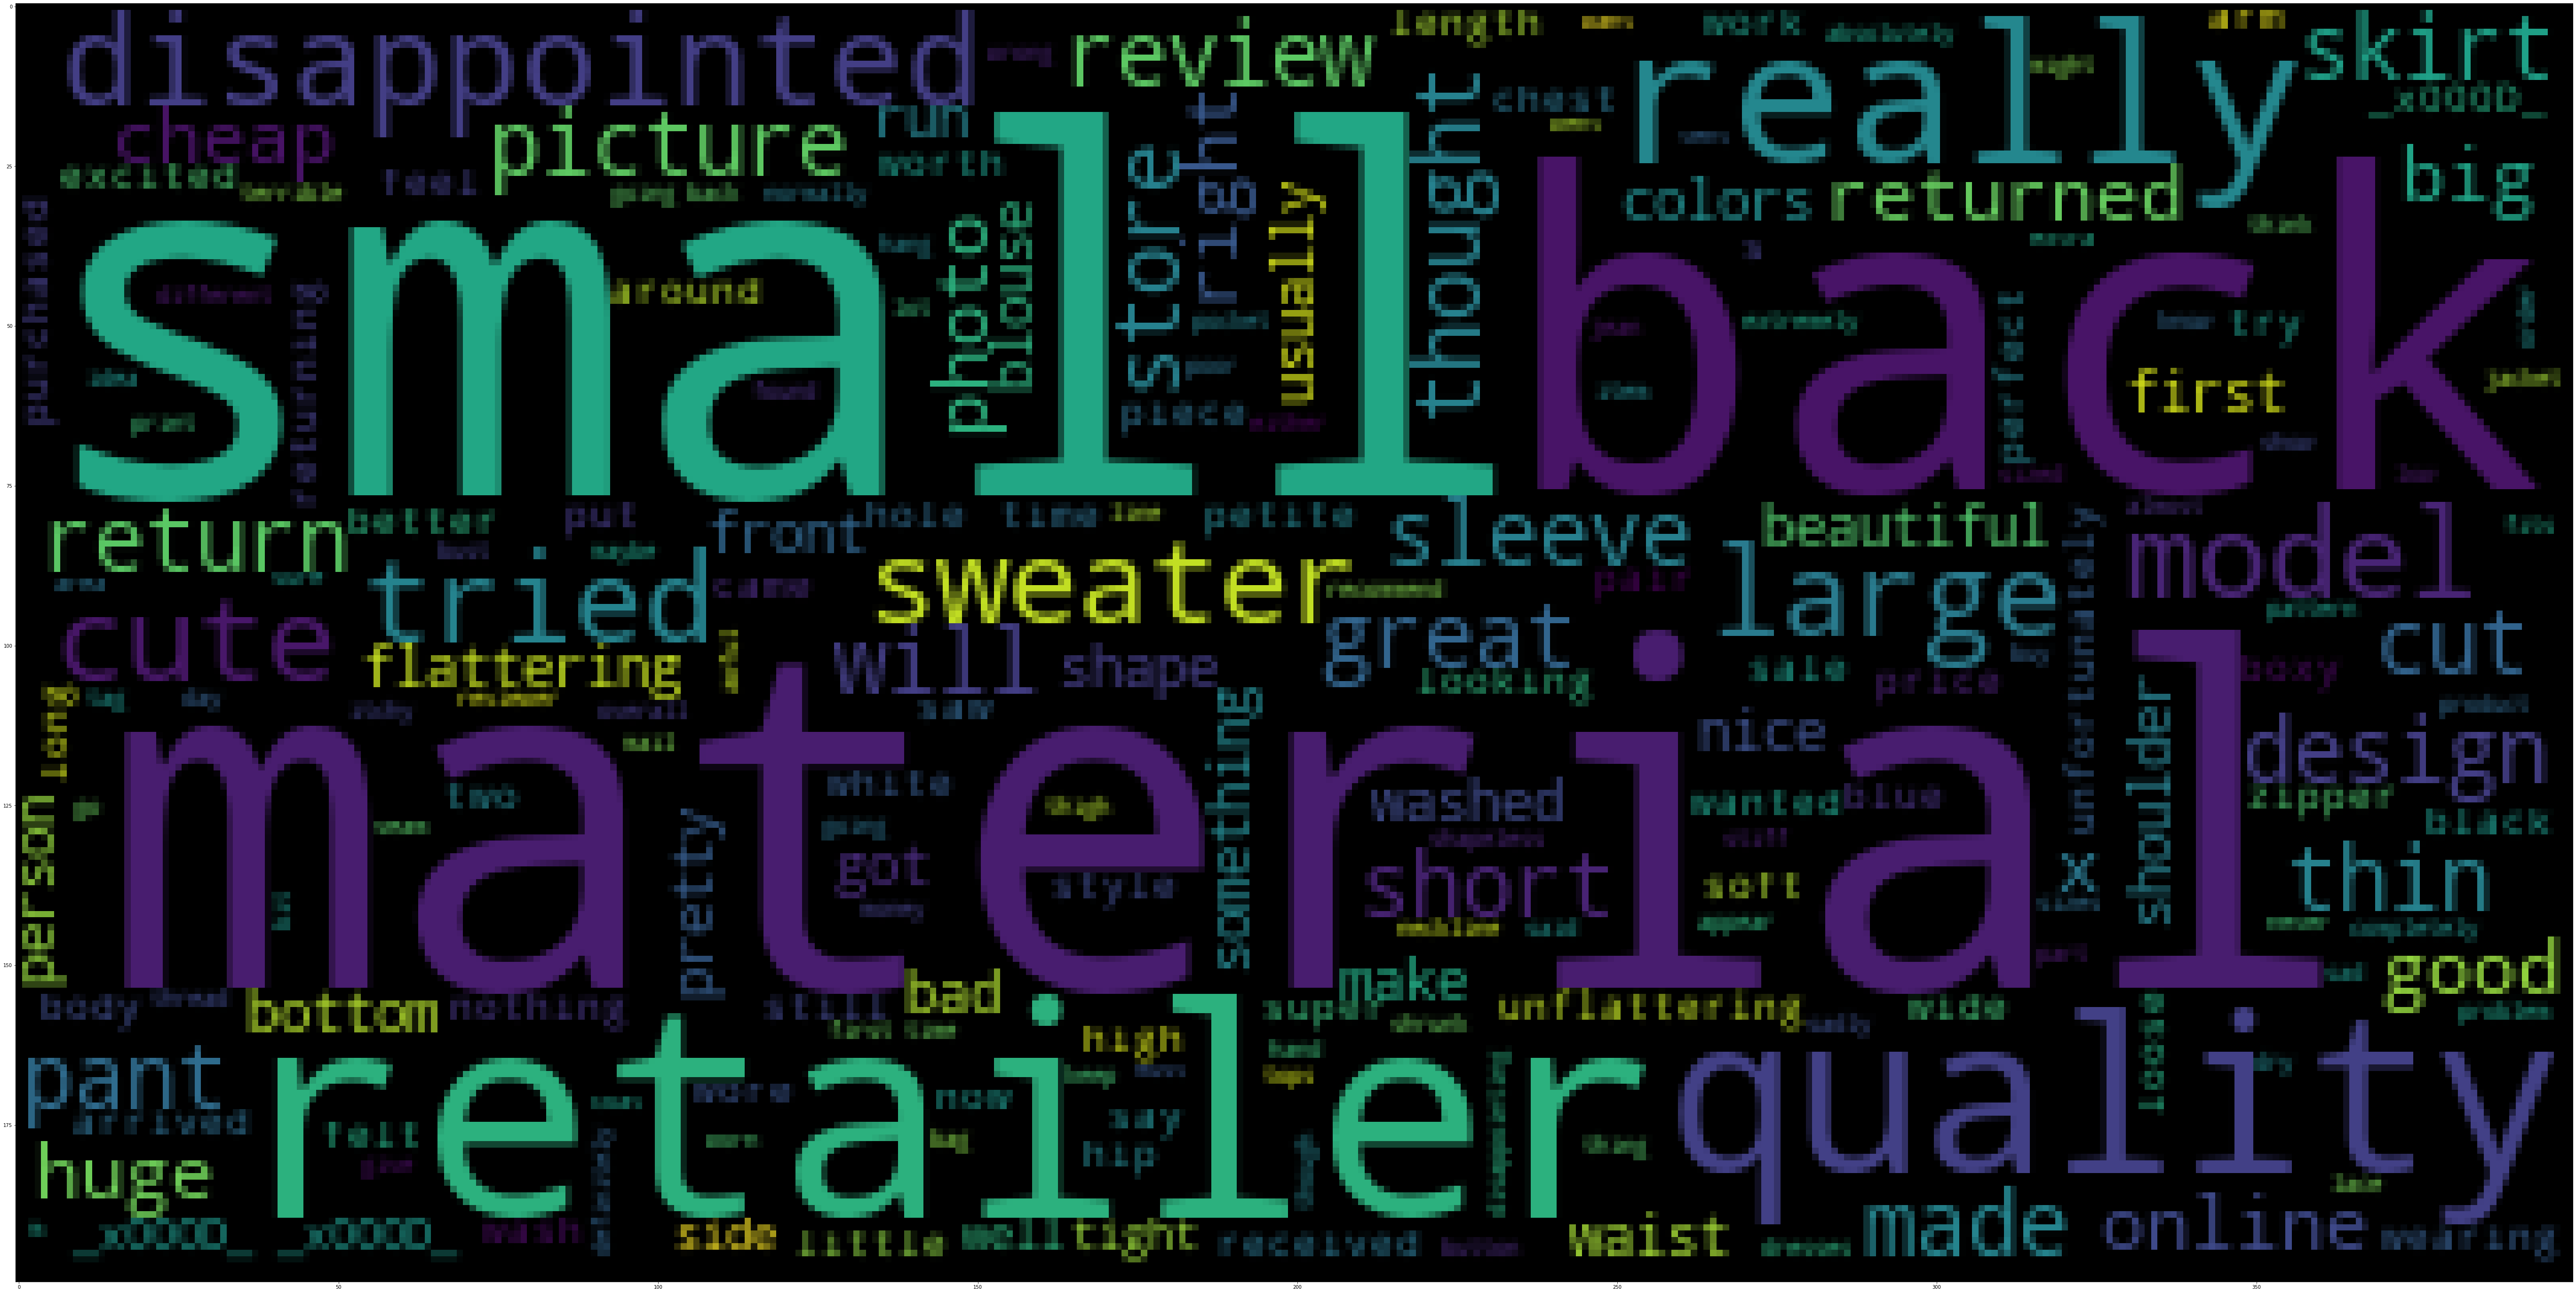

In [ ]:
#WordCloud for Negative Reviews!
wcn = WordCloud(stopwords = stop2).generate(' '.join(negative_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(180,50))
plt.imshow(wcn)

In [ ]:
#Creating Dataframe for Sentiment Analysis!
sentiment_analysis=wcrd1[['Category','Subcategory1','Customer_Age','Location']].join(review_eda.new_sentiment)

In [ ]:
#Understanding sentiment among customers for different Categories!
pd.crosstab(sentiment_analysis.Category,sentiment_analysis.new_sentiment)

new_sentiment,Negative,Neutral,Positive
Category,,,
General,2009,3992,5663
General Petite,1154,2249,3375
Initmates,240,378,602


In [ ]:
#Understanding sentiment among customers for different Sub-Category1!
pd.crosstab(sentiment_analysis.Subcategory1,sentiment_analysis.new_sentiment)

new_sentiment,Negative,Neutral,Positive
Subcategory1,,,
Bottoms,545,1040,1599
Dresses,920,1847,2604
Intimate,283,437,688
Jackets,173,303,403
Tops,1452,2963,4298
Trend,30,29,48


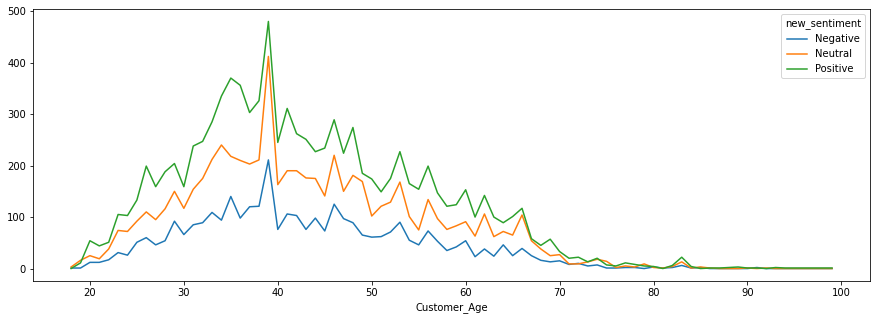

In [ ]:
#Understanding Sentiment for different Age-Groups!
pd.crosstab(sentiment_analysis.Customer_Age,sentiment_analysis.new_sentiment).plot(figsize=[15,5])

In [ ]:
#Understanding Sentiment among different Locations!
pd.crosstab(sentiment_analysis.Location,sentiment_analysis.new_sentiment)

new_sentiment,Negative,Neutral,Positive
Location,,,
Bangalore,789,1502,2114
Chennai,361,663,935
Gurgaon,1253,2438,3670
Mumbai,1000,2016,2921


## Ratings Model [Multinomial Classification]

In [9]:
#UDF for cleaning the Reviews!
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = " ".join(x for x in text.split() if x not in stop)
    return(text)

In [10]:
rm=wcrd1[['Rating','Review_Text']]

In [11]:
#Using Apply Function for Review Text!
rm['cleaned_review']=rm.Review_Text.apply(clean_text)

### Vectorization

In [ ]:
count_vect = CountVectorizer()

In [ ]:
#DTM for Cleaned Review Text!
count_vect.fit(rm.cleaned_review)
yelp_count_vect = count_vect.transform(rm.cleaned_review)
dtm = pd.DataFrame(yelp_count_vect.todense(), columns = count_vect.get_feature_names_out())
dtm['ém original'] = rm.cleaned_review
dtm

,_________,__________,___________,____________,_____________,_______________,_________________,_______________________xd_,___________________xd_,_______________xd_,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,â¼ber,ém original
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high hopes dress really wanted work initially ...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,love love love jumpsuit fun flirty fabulous ev...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
19658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ordered skirt friday arrived monday expectatio...
19659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lbs pearshaped ordered fit perfectly skimming ...
19660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,love love skirt pretty green color great quali...


In [ ]:
#Creating DataFrame for Frequent words!
word_freq = pd.DataFrame(dtm.sum(), columns = ['freq'])

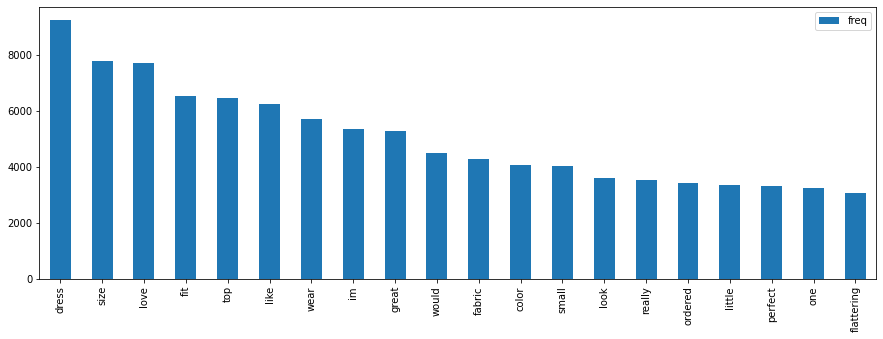

In [ ]:
#Analyzing and Visualizing words which are frequent in DTM!
word_freq.sort_values('freq', ascending = False).head(20).plot(kind='bar',figsize=[15,5])

### Predictive Modelling for Rating Based on Review

In [12]:
#Storing Review Title!
rt=wcrd1[['Review_Title']]

In [13]:
#Cleaning Review Title!
rt['cleaned_review_title']=rt.Review_Title.apply(clean_text)

In [ ]:
rt

,Review_Title,cleaned_review_title
2,Some major design flaws,major design flaws
3,My favorite buy!,favorite buy
4,Flattering shirt,flattering shirt
5,Not for the very petite,petite
6,Cagrcoal shimmer fun,cagrcoal shimmer fun
...,...,...
23481,Great dress for many occasions,great dress many occasions
23482,Wish it was made of cotton,wish made cotton
23483,"Cute, but see through",cute see
23484,"Very cute dress, perfect for summer parties an...",cute dress perfect summer parties


In [14]:
#Creating DTM for Review Title using TFIDF Vectorization!
review_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}',
                             ngram_range=(1, 1 ), 
                             min_df=5,
                             max_df=0.9, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=2000)
review_vect.fit(rt.cleaned_review_title)

TfidfVectorizer(encoding='latin-1', max_df=0.9, max_features=2000, min_df=5,
                token_pattern='\\w{1,}')

In [15]:
rt_tfidf=review_vect.transform(rt.cleaned_review_title)
dtm_rt1 = pd.DataFrame(rt_tfidf.todense(), columns = review_vect.get_feature_names_out())
dtm_rt1

,absolutely,add,addition,adds,adorable,adore,affordable,ag,agree,airy,...,year,years,yellow,yes,yet,yoga,young,youre,yuck,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Categorical Variables Dummies

In [ ]:
#Creating Dummies for categorical variables!
wc_mul=wcrd[['Category','Subcategory1','SubCategory2','Location','Channel']]

In [ ]:
mulcol=['Category','Subcategory1','SubCategory2','Location','Channel']

In [ ]:
mul_wc=pd.get_dummies(wc_mul, columns = mulcol, drop_first = True)

In [ ]:
#Joining Age after creating dummy vars!
mul_wc=mul_wc.join(wcrd1.Customer_Age)

In [ ]:
mul_wc.reset_index(drop=True,inplace=True)

In [ ]:
mul_wc

,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,Subcategory1_Tops,Subcategory1_Trend,SubCategory2_Casual bottoms,SubCategory2_Chemises,SubCategory2_Dresses,...,SubCategory2_Skirts,SubCategory2_Sleep,SubCategory2_Sweaters,SubCategory2_Swim,SubCategory2_Trend,Location_Chennai,Location_Gurgaon,Location_Mumbai,Channel_Web,Customer_Age
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,60
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,50
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,47
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,49
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,34
19658,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,48
19659,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,31
19660,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,28


In [16]:
#Creating DTM for Reviews Description using TFIDF Vectorization!
review_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}',
                             ngram_range=(1, 1 ), 
                             min_df=5,
                             max_df=0.9, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=2000)
review_vect.fit(rm.cleaned_review)

TfidfVectorizer(encoding='latin-1', max_df=0.9, max_features=2000, min_df=5,
                token_pattern='\\w{1,}')

In [17]:
rm_tfidf=review_vect.transform(rm.cleaned_review)
dtm_rm = pd.DataFrame(rm_tfidf.todense(), columns = review_vect.get_feature_names_out())
dtm_rm

,_xd_,able,absolute,absolutely,accent,accents,accentuate,accentuates,accessories,accommodate,...,youll,young,younger,youre,zero,zip,zipped,zipper,zippers,â
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.173391,0.0,0.151718,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
19658,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
19659,0.0,0.30059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
19660,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [18]:
#Concatinating the Dummy Variables,DTM of Cleaned Review,DTM of Cleaned Review Title all as X variables for Predictive Analysis!
x_vars=pd.concat([dtm_rm,dtm_rt1],axis=1)
x_vars

,_xd_,able,absolute,absolutely,accent,accents,accentuate,accentuates,accessories,accommodate,...,year,years,yellow,yes,yet,yoga,young,youre,yuck,zipper
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19658,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19659,0.0,0.30059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Test Split

In [ ]:
y = rm.Rating
x = x_vars

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [ ]:
train_x.shape

(13763, 2892)

In [ ]:
test_x.shape

(5899, 2892)

In [ ]:
train_x

,_xd_,able,absolute,absolutely,accent,accents,accentuate,accentuates,accessories,accommodate,...,year,years,yellow,yes,yet,yoga,young,youre,yuck,zipper
1984,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17504,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10380,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16809,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16416,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7763,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15377,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17730,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_x

,_xd_,able,absolute,absolutely,accent,accents,accentuate,accentuates,accessories,accommodate,...,year,years,yellow,yes,yet,yoga,young,youre,yuck,zipper
2351,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.240628,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7008,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14102,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7613,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18663,0.0,0.0,0.0,0.146313,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13217,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15138,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15672,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### LinearSVC Model

In [ ]:
lsvc_model = LinearSVC(C=1.0).fit(train_x, train_y)

In [ ]:
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(train_x)))
print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(test_x)))

              precision    recall  f1-score   support

           1       0.94      0.86      0.90       492
           2       0.87      0.77      0.82       966
           3       0.79      0.75      0.77      1694
           4       0.76      0.60      0.67      3000
           5       0.86      0.95      0.90      7611

    accuracy                           0.84     13763
   macro avg       0.84      0.79      0.81     13763
weighted avg       0.83      0.84      0.83     13763

              precision    recall  f1-score   support

           1       0.35      0.23      0.28       199
           2       0.31      0.30      0.31       394
           3       0.42      0.35      0.38       770
           4       0.45      0.35      0.40      1289
           5       0.78      0.90      0.83      3247

    accuracy                           0.64      5899
   macro avg       0.46      0.42      0.44      5899
weighted avg       0.61      0.64      0.62      5899



### KNN Model

In [ ]:
#Setting up Grid for KNN Model!
grid = {'n_neighbors':[3,5,7,9,11,13,15,17,20], 'weights' : ['uniform','distance'] }

In [ ]:
#Fitting up the Model and Getting Best Params!
knn_model = GridSearchCV(KNeighborsClassifier(),grid, scoring='accuracy', cv=5, n_jobs = -1, verbose = True)
knn_model = knn_model.fit(train_x, train_y)
print(knn_model.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'n_neighbors': 20, 'weights': 'distance'}


In [ ]:
#Fitting The Model with Best Parameters!
knn_model_bp =KNeighborsClassifier(n_neighbors=20,weights='distance').fit(train_x, train_y)

In [ ]:
print(sklearn.metrics.classification_report(train_y, knn_model_bp.predict(train_x)))
print(sklearn.metrics.classification_report(test_y, knn_model_bp.predict(test_x)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       966
           3       1.00      1.00      1.00      1694
           4       1.00      1.00      1.00      3000
           5       1.00      1.00      1.00      7611

    accuracy                           1.00     13763
   macro avg       1.00      1.00      1.00     13763
weighted avg       1.00      1.00      1.00     13763

              precision    recall  f1-score   support

           1       0.42      0.17      0.24       199
           2       0.27      0.16      0.20       394
           3       0.38      0.34      0.36       770
           4       0.42      0.16      0.23      1289
           5       0.70      0.94      0.80      3247

    accuracy                           0.61      5899
   macro avg       0.44      0.36      0.37      5899
weighted avg       0.56      0.61      0.56      5899



In [ ]:
#Second Model of KNN with own Parameters!
knn_model_op =KNeighborsClassifier(n_neighbors=20,weights='uniform').fit(train_x, train_y)

In [ ]:
print(sklearn.metrics.classification_report(train_y, knn_model_op.predict(train_x)))
print(sklearn.metrics.classification_report(test_y, knn_model_op.predict(test_x)))

              precision    recall  f1-score   support

           1       0.48      0.21      0.29       492
           2       0.40      0.29      0.33       966
           3       0.45      0.47      0.46      1694
           4       0.51      0.20      0.29      3000
           5       0.72      0.94      0.82      7611

    accuracy                           0.65     13763
   macro avg       0.51      0.42      0.44     13763
weighted avg       0.61      0.65      0.60     13763

              precision    recall  f1-score   support

           1       0.41      0.20      0.27       199
           2       0.26      0.18      0.21       394
           3       0.38      0.35      0.37       770
           4       0.43      0.16      0.24      1289
           5       0.70      0.93      0.80      3247

    accuracy                           0.61      5899
   macro avg       0.44      0.37      0.38      5899
weighted avg       0.56      0.61      0.56      5899



### MultinomianalNB Model

In [ ]:
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(train_x,train_y)

MultinomialNB()

In [ ]:
print(sklearn.metrics.classification_report(train_y, nb_model.predict(train_x)))
print(sklearn.metrics.classification_report(test_y, nb_model.predict(test_x)))

              precision    recall  f1-score   support

           1       0.88      0.23      0.37       492
           2       0.70      0.30      0.42       966
           3       0.54      0.58      0.56      1694
           4       0.60      0.39      0.47      3000
           5       0.77      0.95      0.85      7611

    accuracy                           0.71     13763
   macro avg       0.70      0.49      0.53     13763
weighted avg       0.70      0.71      0.68     13763

              precision    recall  f1-score   support

           1       0.52      0.08      0.14       199
           2       0.35      0.15      0.21       394
           3       0.43      0.44      0.43       770
           4       0.45      0.29      0.35      1289
           5       0.75      0.94      0.83      3247

    accuracy                           0.65      5899
   macro avg       0.50      0.38      0.39      5899
weighted avg       0.61      0.65      0.61      5899



### Logistic Regression Model

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(train_x,train_y)

LogisticRegression()

In [ ]:
print(sklearn.metrics.classification_report(train_y, log.predict(train_x)))
print(sklearn.metrics.classification_report(test_y, log.predict(test_x)))

              precision    recall  f1-score   support

           1       0.88      0.54      0.67       492
           2       0.75      0.58      0.65       966
           3       0.68      0.67      0.68      1694
           4       0.70      0.54      0.61      3000
           5       0.83      0.95      0.89      7611

    accuracy                           0.79     13763
   macro avg       0.77      0.66      0.70     13763
weighted avg       0.78      0.79      0.78     13763

              precision    recall  f1-score   support

           1       0.50      0.18      0.27       199
           2       0.37      0.29      0.33       394
           3       0.45      0.40      0.42       770
           4       0.47      0.36      0.40      1289
           5       0.77      0.92      0.84      3247

    accuracy                           0.66      5899
   macro avg       0.51      0.43      0.45      5899
weighted avg       0.63      0.66      0.64      5899



### Ratings Model using Categorical Variables

In [ ]:
#Storing the Ratings as Y!
y_mul_wc=wcrd1.Rating.reset_index(drop=True)

In [ ]:
#Train and Test Split of only Categorical Variables!
train_x_mw, test_x_mw, train_y_mw, test_y_mw = train_test_split(mul_wc, y_mul_wc, test_size = 0.3, random_state = 123)

In [ ]:
#Setting up Grid for XGB Model!
param_grid = {'learning_rate' : [0.01, 0.05, 0.1],   'n_estimators' : [100,200,300],'max_depth' : [2,3,4]}

In [ ]:
#GridSearchCV for XGB!
xgcv = GridSearchCV(XGBClassifier(), param_grid, cv=5,verbose=1)

In [ ]:
xgcv.fit(train_x_mw, train_y_mw)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
print(xgcv.best_params_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


In [ ]:
#Fitting the Model with Best Parameters!
xgb_mw=XGBClassifier(learning_rate= 0.01, max_depth= 2, n_estimators= 100).fit(train_x_mw,train_y_mw)

In [ ]:
print(sklearn.metrics.classification_report(train_y_mw, xgb_mw.predict(train_x_mw)))
print(sklearn.metrics.classification_report(test_y_mw, xgb_mw.predict(test_x_mw)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       492
           2       0.00      0.00      0.00       966
           3       0.00      0.00      0.00      1694
           4       0.00      0.00      0.00      3000
           5       0.55      1.00      0.71      7611

    accuracy                           0.55     13763
   macro avg       0.11      0.20      0.14     13763
weighted avg       0.31      0.55      0.39     13763

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       199
           2       0.00      0.00      0.00       394
           3       0.00      0.00      0.00       770
           4       0.00      0.00      0.00      1289
           5       0.55      1.00      0.71      3247

    accuracy                           0.55      5899
   macro avg       0.11      0.20      0.14      5899
weighted avg       0.30      0.55      0.39      5899



## Recommendation Model [Binary Classification]

In [ ]:
# Making the Recommend_Flag as Y Variable!
y_vars_rm=wcrd1.Recommend_Flag.reset_index(drop=True)

In [ ]:
#Choosing same X_Vars for the Model!
x_vars

,_xd_,able,absolute,absolutely,accent,accents,accentuate,accentuates,accessories,accommodate,...,year,years,yellow,yes,yet,yoga,young,youre,yuck,zipper
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19658,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19659,0.0,0.30059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Test Split for Binary Clasification

In [ ]:
train_x_rm, test_x_rm, train_y_rm, test_y_rm = train_test_split(x_vars, y_vars_rm, test_size = 0.3, random_state = 123)

In [ ]:
train_x_rm.shape

(13763, 2892)

In [ ]:
test_x_rm.shape

(5899, 2892)

### LinearSVC Model for Recommendation

In [ ]:
lsvc_model1 = LinearSVC(C=1.0).fit(train_x_rm, train_y_rm)

In [ ]:
print(sklearn.metrics.classification_report(train_y_rm, lsvc_model1.predict(train_x_rm)))
print(sklearn.metrics.classification_report(test_y_rm, lsvc_model1.predict(test_x_rm)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      2502
           1       0.97      0.98      0.98     11261

    accuracy                           0.96     13763
   macro avg       0.95      0.93      0.94     13763
weighted avg       0.96      0.96      0.96     13763

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1073
           1       0.93      0.94      0.94      4826

    accuracy                           0.90      5899
   macro avg       0.83      0.82      0.82      5899
weighted avg       0.90      0.90      0.90      5899



### KNN Model for Recommendation

In [ ]:
#Setting up Grid for KNN Model!
grid = {'n_neighbors':[3,5,7,9,11,13,15,17,20], 'weights' : ['uniform','distance'] }

In [ ]:
#GridSearchCV to get Best Parameters!
knn_model1 = GridSearchCV(KNeighborsClassifier(),grid, scoring='accuracy', cv=5, n_jobs = -1, verbose = True)
knn_model1 = knn_model1.fit(train_x_rm, train_y_rm)
print(knn_model1.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'n_neighbors': 13, 'weights': 'distance'}


In [ ]:
#Fitting the model with Best Parameters!
knn_model1_bp = KNeighborsClassifier(n_neighbors=13, weights='distance').fit(train_x_rm,train_y_rm)

In [ ]:
print(sklearn.metrics.classification_report(train_y_rm, knn_model1_bp.predict(train_x_rm)))
print(sklearn.metrics.classification_report(test_y_rm, knn_model1_bp.predict(test_x_rm)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2502
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     13763
   macro avg       1.00      1.00      1.00     13763
weighted avg       1.00      1.00      1.00     13763

              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1073
           1       0.91      0.94      0.92      4826

    accuracy                           0.87      5899
   macro avg       0.80      0.75      0.77      5899
weighted avg       0.87      0.87      0.87      5899



In [ ]:
#Setting up 2nd Model with own Parameters!
knn_model1_op = KNeighborsClassifier(n_neighbors=13, weights='uniform').fit(train_x_rm,train_y_rm)

In [ ]:
print(sklearn.metrics.classification_report(train_y_rm, knn_model1_op.predict(train_x_rm)))
print(sklearn.metrics.classification_report(test_y_rm, knn_model1_op.predict(test_x_rm)))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2502
           1       0.92      0.95      0.94     11261

    accuracy                           0.90     13763
   macro avg       0.84      0.80      0.81     13763
weighted avg       0.89      0.90      0.89     13763

              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1073
           1       0.91      0.94      0.92      4826

    accuracy                           0.87      5899
   macro avg       0.80      0.75      0.77      5899
weighted avg       0.87      0.87      0.87      5899



### MultinomialNB Model for Recommendation

In [ ]:
nb_model.fit(train_x_rm,train_y_rm)

MultinomialNB()

In [ ]:
print(sklearn.metrics.classification_report(train_y_rm, nb_model.predict(train_x_rm)))
print(sklearn.metrics.classification_report(test_y_rm, nb_model.predict(test_x_rm)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2502
           1       0.94      0.96      0.95     11261

    accuracy                           0.92     13763
   macro avg       0.87      0.83      0.85     13763
weighted avg       0.91      0.92      0.91     13763

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1073
           1       0.93      0.95      0.94      4826

    accuracy                           0.90      5899
   macro avg       0.84      0.80      0.82      5899
weighted avg       0.90      0.90      0.90      5899



### Logistic Regression Model for Recommendation

In [ ]:
log.fit(train_x_rm,train_y_rm)

LogisticRegression()

In [ ]:
print(sklearn.metrics.classification_report(train_y_rm, log.predict(train_x_rm)))
print(sklearn.metrics.classification_report(test_y_rm, log.predict(test_x_rm)))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2502
           1       0.94      0.98      0.96     11261

    accuracy                           0.94     13763
   macro avg       0.92      0.86      0.88     13763
weighted avg       0.93      0.94      0.93     13763

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1073
           1       0.92      0.96      0.94      4826

    accuracy                           0.90      5899
   macro avg       0.86      0.80      0.82      5899
weighted avg       0.90      0.90      0.90      5899



### Recommendation Model using Categorical Variables

In [ ]:
#Separating Categorical X vars and Y var for Train and Test Split!
y_mul_wc_rm=wcrd1.Recommend_Flag.reset_index(drop=True)

In [ ]:
train_x_mw_rm, test_x_mw_rm, train_y_mw_rm, test_y_mw_rm = train_test_split(mul_wc, y_mul_wc_rm, test_size = 0.3, random_state = 123)

In [ ]:
#GridSearchCV for XGB!
xgcv = GridSearchCV(XGBClassifier(), param_grid, cv=5,verbose=1)

In [ ]:
xgcv.fit(train_x_mw_rm,train_y_mw_rm)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
print(xgcv.best_params_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


In [ ]:
#Fitting the Model with Best Parameters!
xgb_rm=XGBClassifier(learning_rate= 0.01, max_depth= 2, n_estimators= 100).fit(train_x_mw_rm,train_y_mw_rm)

In [ ]:
print(sklearn.metrics.classification_report(train_y_mw_rm, xgb_rm.predict(train_x_mw_rm)))
print(sklearn.metrics.classification_report(test_y_mw_rm, xgb_rm.predict(test_x_mw_rm)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2502
           1       0.82      1.00      0.90     11261

    accuracy                           0.82     13763
   macro avg       0.41      0.50      0.45     13763
weighted avg       0.67      0.82      0.74     13763

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1073
           1       0.82      1.00      0.90      4826

    accuracy                           0.82      5899
   macro avg       0.41      0.50      0.45      5899
weighted avg       0.67      0.82      0.74      5899



### Text Segmentation

In [ ]:
#Finding SC-Score for each cluster!
sc_score = []
for i in range(3,20):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1,random_state=5)
    res = model.fit(train_x)
    score = metrics.silhouette_score(x_vars, res.labels_)
    print('cluster :', i, score)
    sc_score.append(score)

cluster : 3 0.022719737854736743
cluster : 4 0.02146393569578335
cluster : 5 0.022602610135173874
cluster : 6 0.022548461239228976
cluster : 7 0.023807886455359584
cluster : 8 0.023924813140342328
cluster : 9 0.025847760735315025
cluster : 10 0.02685831645817294
cluster : 11 0.029094198346830313
cluster : 12 0.03177926838366463
cluster : 13 0.035398522077329034
cluster : 14 0.0355850093319716
cluster : 15 0.038488605339862945
cluster : 16 0.03921520238571333
cluster : 17 0.04036225059958857
cluster : 18 0.04060023018206119
cluster : 19 0.042743980812433656


In [ ]:
#Fitting X_Vars with 20 clusters!
text_seg_model = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = text_seg_model.fit(x_vars)

In [ ]:
#Calculating Cluster Centers!
cluster_centers = np.array(res.cluster_centers_)
#Each values(Feature Names) distance to Cluster Center!
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
#Storing the Feature Names!
vocab = np.array(x_vars.columns)

In [ ]:
words=set()
for i in range(len(res.cluster_centers_)):#We defined how many clusters while calculating SC-Score! 
    words = words.union(set(vocab[sorted_vals[i][-20:]]))#Storing the closest words to the Cluster center!
    print('Important Words related segment:', i)
    print(vocab[sorted_vals[i][-20:]])#Getting Top 20 Words for Each Segment!
words=list(words)
words

Important Words related segment: 0
['long' 'slim' 'work' 'narrow' 'would' 'hip' 'im' 'shape' 'waist' 'fabric'
 'fit' 'pear' 'size' 'wider' 'work' 'curvy' 'dress' 'tight' 'hips' 'hips']
Important Words related segment: 1
['bought' 'small' 'color' 'pretty' 'soft' 'nice' 'little' 'sweet' 'love'
 'fit' 'like' 'wear' 'dress' 'size' 'dress' 'top' 'soft' 'little' 'top'
 'sweet']
Important Words related segment: 2
['well' 'dress' 'like' 'comfy' 'fabric' 'wear' 'comfortable' 'look'
 'beautiful' 'im' 'great' 'size' 'fit' 'top' 'super' 'love' 'dress'
 'comfortable' 'flattering' 'flattering']
Important Words related segment: 3
['fits' 'flattering' 'soft' 'like' 'color' 'im' 'pants' 'bought' 'top'
 'perfect' 'comfortable' 'size' 'fit' 'wear' 'dress' 'great' 'love'
 'wanted' 'dress' 'love']
Important Words related segment: 4
['soft' 'great' 'slip' 'fabric' 'would' 'im' 'large' 'wear' 'dress' 'love'
 'size' 'little' 'top' 'light' 'top' 'dress' 'fun' 'beautiful' 'flowy'
 'flowy']
Important Words relat

['fall',
 'look',
 'got',
 'big',
 'perfect',
 'slip',
 'beautiful',
 'little',
 'skirt',
 'large',
 'well',
 'gorgeous',
 'jacket',
 'wanted',
 'narrow',
 'wider',
 'super',
 'design',
 'medium',
 'style',
 'like',
 'xs',
 'really',
 'usually',
 'comfortable',
 'fits',
 'fit',
 'back',
 'jeans',
 'looks',
 'versatile',
 'shape',
 'soft',
 'dress',
 'comfy',
 'bought',
 'blouse',
 'color',
 'summer',
 'slim',
 'pretty',
 'size',
 'runs',
 'curvy',
 'hips',
 'waist',
 'cozy',
 'work',
 'would',
 'comfort',
 'fabric',
 'tight',
 'long',
 'pants',
 'great',
 'pear',
 'staple',
 'piece',
 'shirt',
 'cute',
 'nice',
 'fun',
 'small',
 'flattering',
 'bit',
 'wear',
 'jackets',
 'love',
 'quality',
 'im',
 'hip',
 'sweater',
 'top',
 'lovely',
 'sweet',
 'ordered',
 'light',
 'flowy',
 'stylish']

In [ ]:
#We concatenate Each Review and its Segment!
pd.concat([rm.cleaned_review, pd.Series(res.labels_, index = rm.cleaned_review.index)],axis=1)

,cleaned_review,0
2,high hopes dress really wanted work initially ...,5
3,love love love jumpsuit fun flirty fabulous ev...,5
4,shirt flattering due adjustable front tie perf...,2
5,love tracy reese dresses one petite feet tall ...,5
6,aded basket hte last mintue see would look lik...,5
...,...,...
23481,happy snag dress great price easy slip flatter...,13
23482,reminds maternity clothes soft stretchy shiny ...,5
23483,fit well top see never would worked im glad ab...,16
23484,bought dress wedding summer cute unfortunately...,18


In [ ]:
#We concatenate Each Review_Title and its Segment as X_Vars contain Review_Title's Features!
pd.concat([rt.cleaned_review_title, pd.Series(res.labels_, index = rt.cleaned_review_title.index)],axis=1)

,cleaned_review_title,0
2,major design flaws,5
3,favorite buy,5
4,flattering shirt,2
5,petite,5
6,cagrcoal shimmer fun,5
...,...,...
23481,great dress many occasions,13
23482,wish made cotton,5
23483,cute see,16
23484,cute dress perfect summer parties,18


### Topic Mining

In [20]:
#Importing Gensim
import gensim
from gensim import corpora

In [77]:
#UDF to clean the Tokens!
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [27]:
#Storing only Reviews for Topic Mining!
token_tm=rm.cleaned_review

In [85]:
#Using UDF and Splitting the Tokens!
train_tokens1=[clean(doc).split() for doc in token_tm]
train_tokens1

[['high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'every',
  'time',
  'wear',
  'get',
  'nothing',
  'great',
  'compliment'],
 ['shirt',
  'flattering',
  'due',
  'adjustable',
  'front',
  'tie',
  'perfect',
  'length',
  'wear',
  'legging',
  'sleeveless',
  'pair',
  'well',
  'cardigan',
  'love',
  'shirt'],
 ['love',
  'tracy',
  'reese',
  'dress',
  'one',
  'petite',
  'foot',
  'tall',
  'usually',
  'wear'

In [86]:
#Getting the Unique Tokens from Corpora Function!
dictionary1 = corpora.Dictionary(train_tokens1)
print(dictionary1)

Dictionary(16605 unique tokens: ['bottom', 'c', 'cheap', 'comfortable', 'could']...)


In [87]:
#Creating Document Term Matrix from above Tokens!
dtm_tokens1=[dictionary1.doc2bow(doc) for doc in train_tokens1]

In [88]:
#Creating the object for LDA model using Gensim library!
Lda = gensim.models.ldamodel.LdaModel

In [89]:
#Setting up and Trainign LDA model on the document term matrix!
ldamodel = Lda(dtm_tokens1, num_topics=50, id2word = dictionary1)

In [90]:
print("Perplexity: ", ldamodel.log_perplexity(dtm_tokens1))

Perplexity:  -7.6250944203297415


In [91]:
print(ldamodel.print_topics(num_topics=50, num_words=25))

[(0, '0.038*"dress" + 0.032*"red" + 0.019*"fit" + 0.016*"seemed" + 0.016*"much" + 0.016*"available" + 0.013*"pictured" + 0.013*"received" + 0.012*"review" + 0.011*"online" + 0.011*"purchasing" + 0.011*"transition" + 0.011*"petite" + 0.010*"im" + 0.010*"retailer" + 0.009*"appears" + 0.009*"happy" + 0.009*"ordered" + 0.008*"altered" + 0.008*"darker" + 0.008*"size" + 0.008*"expensive" + 0.008*"date" + 0.008*"perfect" + 0.008*"regular"'), (1, '0.057*"blouse" + 0.044*"suit" + 0.027*"back" + 0.017*"stay" + 0.015*"completely" + 0.014*"well" + 0.014*"made" + 0.013*"romantic" + 0.011*"sent" + 0.011*"move" + 0.010*"look" + 0.010*"ivory" + 0.010*"fabric" + 0.010*"place" + 0.010*"bathing" + 0.009*"realized" + 0.009*"love" + 0.009*"front" + 0.009*"flattering" + 0.008*"throughout" + 0.008*"really" + 0.007*"leave" + 0.007*"style" + 0.007*"ordered" + 0.006*"string"'), (2, '0.034*"sweater" + 0.031*"coat" + 0.020*"love" + 0.017*"color" + 0.017*"great" + 0.014*"soft" + 0.014*"green" + 0.014*"warm" + 0.01

In [92]:
#For each topic getting top 25 words!
topics = ldamodel.show_topics(formatted=False, num_words=25,num_topics=50)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,25))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 25 words:
dress red fit seemed much available pictured received review online purchasing transition petite im retailer appears happy ordered altered darker size expensive date perfect regular

Topic 2, top 25 words:
blouse suit back stay completely well made romantic sent move look ivory fabric place bathing realized love front flattering throughout really leave style ordered string

Topic 3, top 25 words:
sweater coat love color great soft green warm wool perfect layering bought size year winter length look one wear long worn true beautiful ive top

Topic 4, top 25 words:
fit size im love fabric rolled like little dress perfect taken length wardrobe wear sleeve pajama general always color look bit long really great got

Topic 5, top 25 words:
dress top like look shapeless justice way dont beautiful picture material flattering fit mid section love excellent fabric im fringe bottom really color size pulling

Topic 6, top 25 words:
jean leg pair fit stretch size ankle pilcr

In [93]:
#UDF Function to get Dominant Topic,Percentage Contribution,Keywords to that Topic for each Review!
def format_topics_sentences(ldamodel=ldamodel, corpus=dtm_tokens1, texts=train_tokens1):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Percentage_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [94]:
format_topics_sentences(ldamodel=ldamodel, corpus=dtm_tokens1, texts=train_tokens1)

,Dominant_Topic,Percentage_Contribution,Topic_Keywords,0
0,39.0,0.5650,"dress, recommend, love, highly, look, beautifu...","[high, hope, dress, really, wanted, work, init..."
1,25.0,0.6466,"wear, love, compliment, great, wore, many, bou...","[love, love, love, jumpsuit, fun, flirty, fabu..."
2,2.0,0.3691,"sweater, coat, love, color, great, soft, green...","[shirt, flattering, due, adjustable, front, ti..."
3,27.0,0.2965,"shirt, like, washed, ok, hung, hand, top, wash...","[love, tracy, reese, dress, one, petite, foot,..."
4,35.0,0.5438,"xd, like, nice, quality, material, fabric, goo...","[aded, basket, hte, last, mintue, see, would, ..."
...,...,...,...,...
19657,48.0,0.3990,"dress, slip, fabric, like, lined, silk, look, ...","[happy, snag, dress, great, price, easy, slip,..."
19658,5.0,0.2376,"jean, leg, pair, fit, stretch, size, ankle, pi...","[reminds, maternity, clothes, soft, stretchy, ..."
19659,42.0,0.6834,"store, size, saw, tried, online, try, went, on...","[fit, well, top, see, never, would, worked, im..."
19660,5.0,0.2459,"jean, leg, pair, fit, stretch, size, ankle, pi...","[bought, dress, wedding, summer, cute, unfortu..."


Refer Word Document For Detailed Report!